In [1]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# Data Preparation and Cleaning

In [2]:
#data acquisition
data = pd.read_csv('games.csv')
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
#check for NA or NULL value
data.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Since no NULL value is presented, no rows will be drop

In [4]:
#extract "the first move" for both white and black from the "moves" columns
data['white_first_move'] = data['moves'].str.split().str[0]
data['black_first_move'] = data['moves'].str.split().str[1]

#remove unnecessary columns 
extract_columns = ['white_first_move', 'black_first_move', 'white_rating', 'black_rating', 'turns']
extract_data = pd.DataFrame(data[extract_columns])
extract_data

,white_first_move,black_first_move,white_rating,black_rating,turns
0,d4,d5,1500,1191,13
1,d4,Nc6,1322,1261,16
2,e4,e5,1496,1500,61
3,d4,d5,1439,1454,61
4,e4,e5,1523,1469,95
...,...,...,...,...,...
20053,d4,f5,1691,1220,24
20054,d4,d6,1233,1196,82
20055,d4,d5,1219,1286,35
20056,e4,d6,1360,1227,109


# Exploratory Data Analysis/Visualisation

Different types of Victory_status: ['outoftime' 'resign' 'mate' 'draw']


<AxesSubplot:xlabel='count', ylabel='victory_status'>

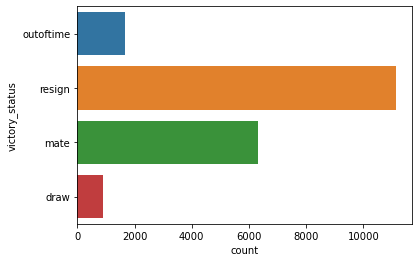

In [5]:
#explore the different types of victory_status
print("Different types of Victory_status:", data["victory_status"].unique())
sb.countplot(data = data, y = data["victory_status"])

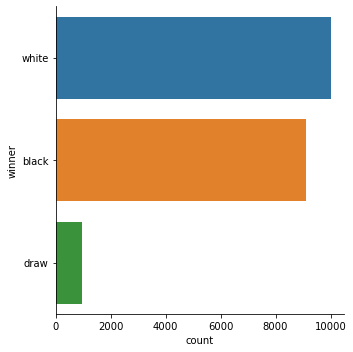

In [6]:
#graph shows the number of black or white being the winner
sb.catplot(data = data, kind = "count", y = "winner")

Since the number of white winning is almost equal to the number of black winning, we can say that the side of the player does not affect the result

In [7]:
#find the different types of white moves
print("Number of different first move for white:",data["white_first_move"].nunique())
print(data["white_first_move"].unique())

Number of different first move for white: 20
['d4' 'e4' 'e3' 'c4' 'Nf3' 'a4' 'Nh3' 'g3' 'h4' 'f4' 'b4' 'Nc3' 'b3' 'h3'
 'd3' 'f3' 'g4' 'a3' 'c3' 'Na3']


In [8]:
#find the different types of black moves
print("Number of different first move for black:",data["black_first_move"].nunique())
print(data["black_first_move"].unique())

Number of different first move for black: 20
['d5' 'Nc6' 'e5' 'c5' 'e6' 'g6' 'Nf6' 'f5' 'd6' 'c6' 'h5' 'h6' 'a6' 'b6'
 'b5' 'f6' 'Nh6' nan 'g5' 'a5' 'Na6']


e4     12598
d4      4522
Nf3      725
c4       716
e3       416
g3       186
b3       173
f4       166
d3       131
Nc3       99
b4        88
c3        56
g4        38
h4        33
a4        28
a3        27
f3        23
Nh3       15
h3        14
Na3        4
Name: white_first_move, dtype: int64


<AxesSubplot:xlabel='white_first_move', ylabel='Count'>

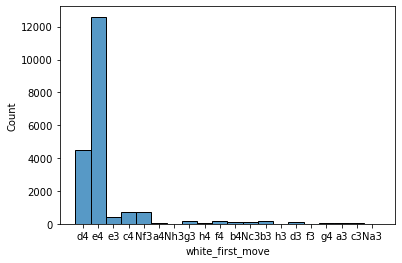

In [9]:
#graph shows the number of counts for each different white moves
print(data["white_first_move"].value_counts())
sb.histplot(x = "white_first_move", data = data)

e5     6988
d5     3667
c5     2883
e6     2083
Nf6    1693
c6      734
d6      543
Nc6     392
g6      387
b6      286
f5      166
a6       50
f6       41
b5       25
h5       24
a5       23
h6       19
g5       18
Nh6      12
Na6       6
Name: black_first_move, dtype: int64


<AxesSubplot:xlabel='black_first_move', ylabel='Count'>

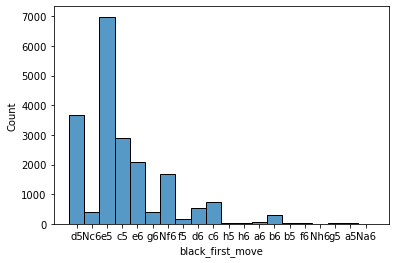

In [10]:
#graph shows the number of counts for each different black moves
print(data["black_first_move"].value_counts())
sb.histplot(x = "black_first_move", data = data)

<AxesSubplot:xlabel='turns', ylabel='Count'>

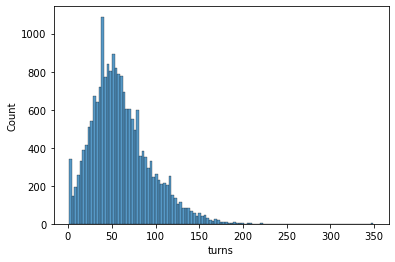

In [11]:
sb.histplot(x = "turns", data = data)

<AxesSubplot:xlabel='white_rating', ylabel='Count'>

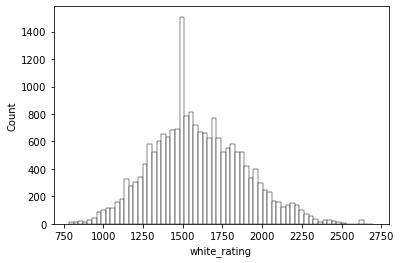

In [12]:
sb.histplot(x = "white_rating", data = data, color ="white")

<AxesSubplot:xlabel='black_rating', ylabel='Count'>

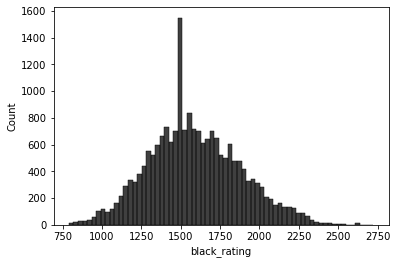

In [13]:
sb.histplot(x = "black_rating", data = data, color= "black")

<AxesSubplot:xlabel='white_first_move', ylabel='white_rating'>

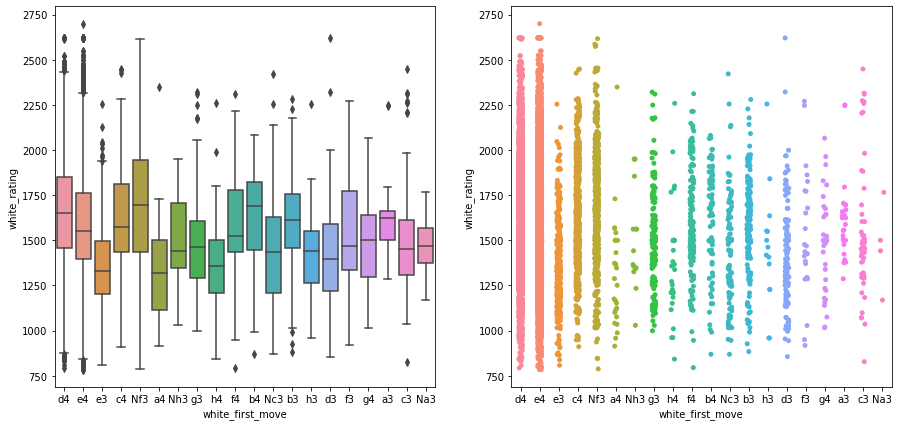

In [14]:
#distribution 
figure, axes = plt.subplots(1, 2, figsize = (15, 7))
sb.boxplot(data = data, x = 'white_first_move', y = 'white_rating', ax=axes[0])
sb.stripplot(data = data, x = 'white_first_move', y = 'white_rating', ax=axes[1])

<AxesSubplot:xlabel='black_rating', ylabel='black_first_move'>

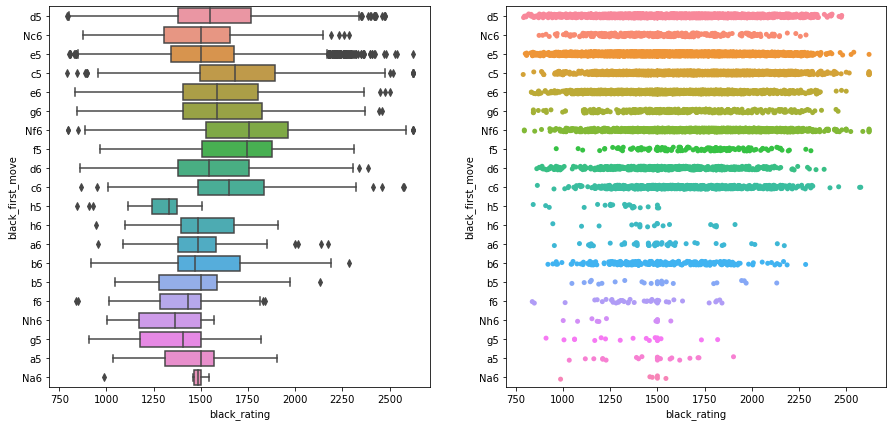

In [15]:
figure, axes = plt.subplots(1, 2, figsize = (15, 7))
sb.boxplot(data = data, y = 'black_first_move', x = 'black_rating', ax=axes[0])
sb.stripplot(data = data, y = 'black_first_move', x = 'black_rating', ax=axes[1])

<AxesSubplot:xlabel='white_first_move', ylabel='Count'>

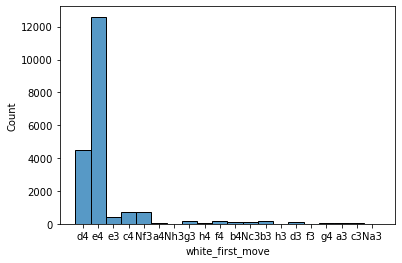

In [16]:
sb.histplot(data = data, x = 'white_first_move')

In [26]:
def get_prob( n , total):
    return n/total

def get_original_count(data, white):
    new = data[(data["white_first_move"] == white)]
    #sb.histplot(x= "black_first_move", data = new)
    counts = pd.DataFrame(new["black_first_move"].value_counts())
    #print(counts)
    total = counts["black_first_move"].sum()
    
    prob_dict = {}
    
    for i in range(len(counts)) :
        name = counts.index.values[i]
        prob = get_prob(counts["black_first_move"][i],total)
        prob_dict[name] = round(prob,3)
    
    list_name = ['e5', 'd5', 'c5', 'e6', 'Nf6', 'd6', 'Nc6']
    list_prob = [prob_dict[name] for name in list_name]
    
    frame = pd.DataFrame()
    frame["black_move"] = list_name
    frame["ori_prob"] = list_prob
    return frame

<AxesSubplot:xlabel='black_move', ylabel='ori_prob'>

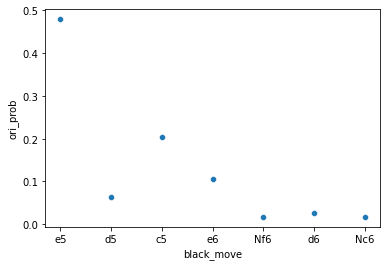

In [27]:
white_e4 = get_original_count(extract_data, "e4")
sb.scatterplot(x='black_move', y='ori_prob', data=white_e4[:8])